In [8]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import tqdm
import csv
import numpy as np


In [9]:
df_phd_v2= pd.read_csv("C://Users//emmhu//OneDrive//Documents//E LEARNING//DU DATA ANALYST//1_Manipulation et Prétraitement de données//Données//Theses Phd-Phdv2 (2e devoir)//PhD_v2.csv",
                       delimiter= ",", quotechar='"',low_memory= False,quoting=csv.QUOTE_ALL,
                       on_bad_lines='skip',encoding='utf-8') 
df_phd_v2.head()

,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,Date de premiere inscription en doctorat,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr
0,Saeed Al marri,NaN,Le credit documentaire et l'onopposabilite des...,Philippe Delebecque,Delebecque Philippe,29561248,Paris 1,27361802,Driot prive,enCours,30-09-11,NaN,NaN,NaN,s69480,non,26-01-12,26-01-12
1,Andrea Ramazzotti,174423705,Application de la PGD a la resolution de probl...,"Jean-Claude Grandidier,Marianne Beringhier","Grandidier Jean-Claude,Beringhier Marianne","715,441,511","Chasseneuil-du-Poitou, Ecole nationale superie...",28024400,"Mecanique des solides, des materiaux, des stru...",enCours,01-10-12,NaN,NaN,NaN,s98826,non,22-11-13,22-11-13
2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,soutenue,NaN,01-01-93,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12
3,Emmanuel Porte,NaN,Socio-histoire des politiques publiques en mat...,Gilles Pollet,Pollet Gilles,na,Lyon 2,02640334X,Science politique,enCours,01-06-11,NaN,NaN,NaN,s88867,non,12-07-13,12-01-16
4,Arthur Devriendt,NaN,LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...,Gabriel Dupuy,Dupuy Gabriel,na,Paris 1,27361802,Geographie,enCours,07-12-09,NaN,NaN,NaN,s89663,non,13-07-13,12-07-13


In [10]:
# Obtenir le type de données contenu dans chaque colonne
df_phd_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447644 entries, 0 to 447643
Data columns (total 18 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Auteur                                    447644 non-null  object 
 1   Identifiant auteur                        317655 non-null  object 
 2   Titre                                     447635 non-null  object 
 3   Directeur de these                        447629 non-null  object 
 4   Directeur de these (nom prenom)           447629 non-null  object 
 5   Identifiant directeur                     447644 non-null  object 
 6   Etablissement de soutenance               447640 non-null  object 
 7   Identifiant etablissement                 430559 non-null  object 
 8   Discipline                                447639 non-null  object 
 9   Statut                                    447644 non-null  object 
 10  Date de premiere ins

In [11]:
print(df_phd_v2.columns)
df_phd_v2.describe(include='all')


Index(['Auteur', 'Identifiant auteur', 'Titre', 'Directeur de these',
       'Directeur de these (nom prenom)', 'Identifiant directeur',
       'Etablissement de soutenance', 'Identifiant etablissement',
       'Discipline', 'Statut', 'Date de premiere inscription en doctorat',
       'Date de soutenance', 'Year', 'Langue de la these',
       'Identifiant de la these', 'Accessible en ligne',
       'Publication dans theses.fr', 'Mise a jour dans theses.fr'],
      dtype='object')


,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,Date de premiere inscription en doctorat,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr
count,447644,317655,447635,447629,447629,447644,447640,430559,447639,447644,63976,390898,390898.000000,383879,447644,447644,447644,447467
unique,430278,313774,446819,159020,159022,98907,567,572,24262,2,4009,3991,NaN,205,447572,2,2765,2633
top,Nicolas Martin,",",#NAME?,Directeur de these inconnu,Directeur de these inconnu,na,Paris 6,27787087,Medecine,soutenue,01-10-18,01-01-94,NaN,fr,s222831,non,24-05-13,07-07-20
freq,16,462,17,713,713,49172,21201,20926,25908,381315,1500,12991,NaN,334404,2,347341,205883,61840
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.247845,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.845610,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
# Identify the mininum and maximum year in the dataset
print(df_phd_v2["Year"].max())
print(df_phd_v2["Year"].min())


2020.0
1971.0


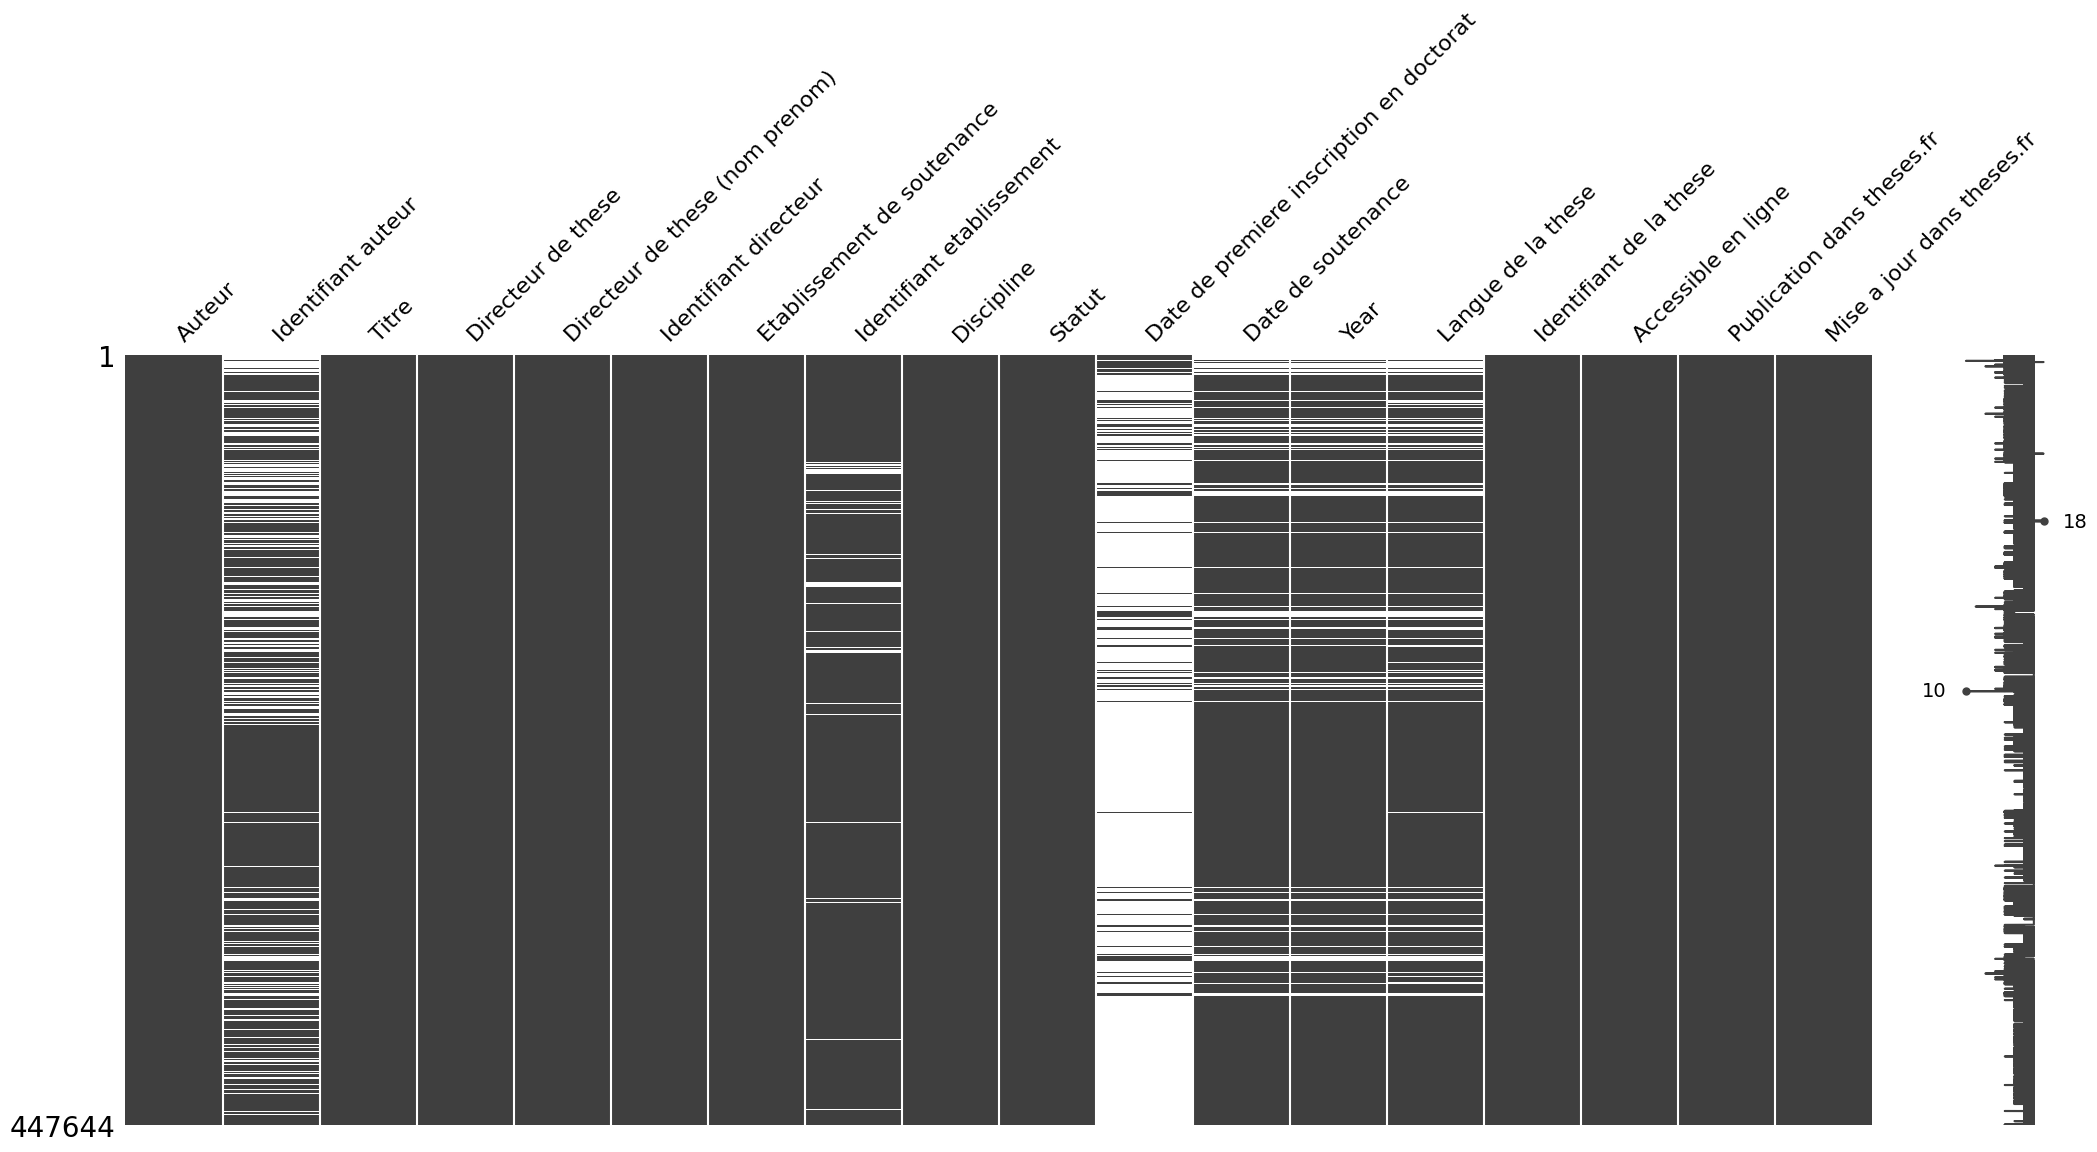

In [13]:
# Visualize the missingness summary

msno.matrix(df_phd_v2)
plt.show()

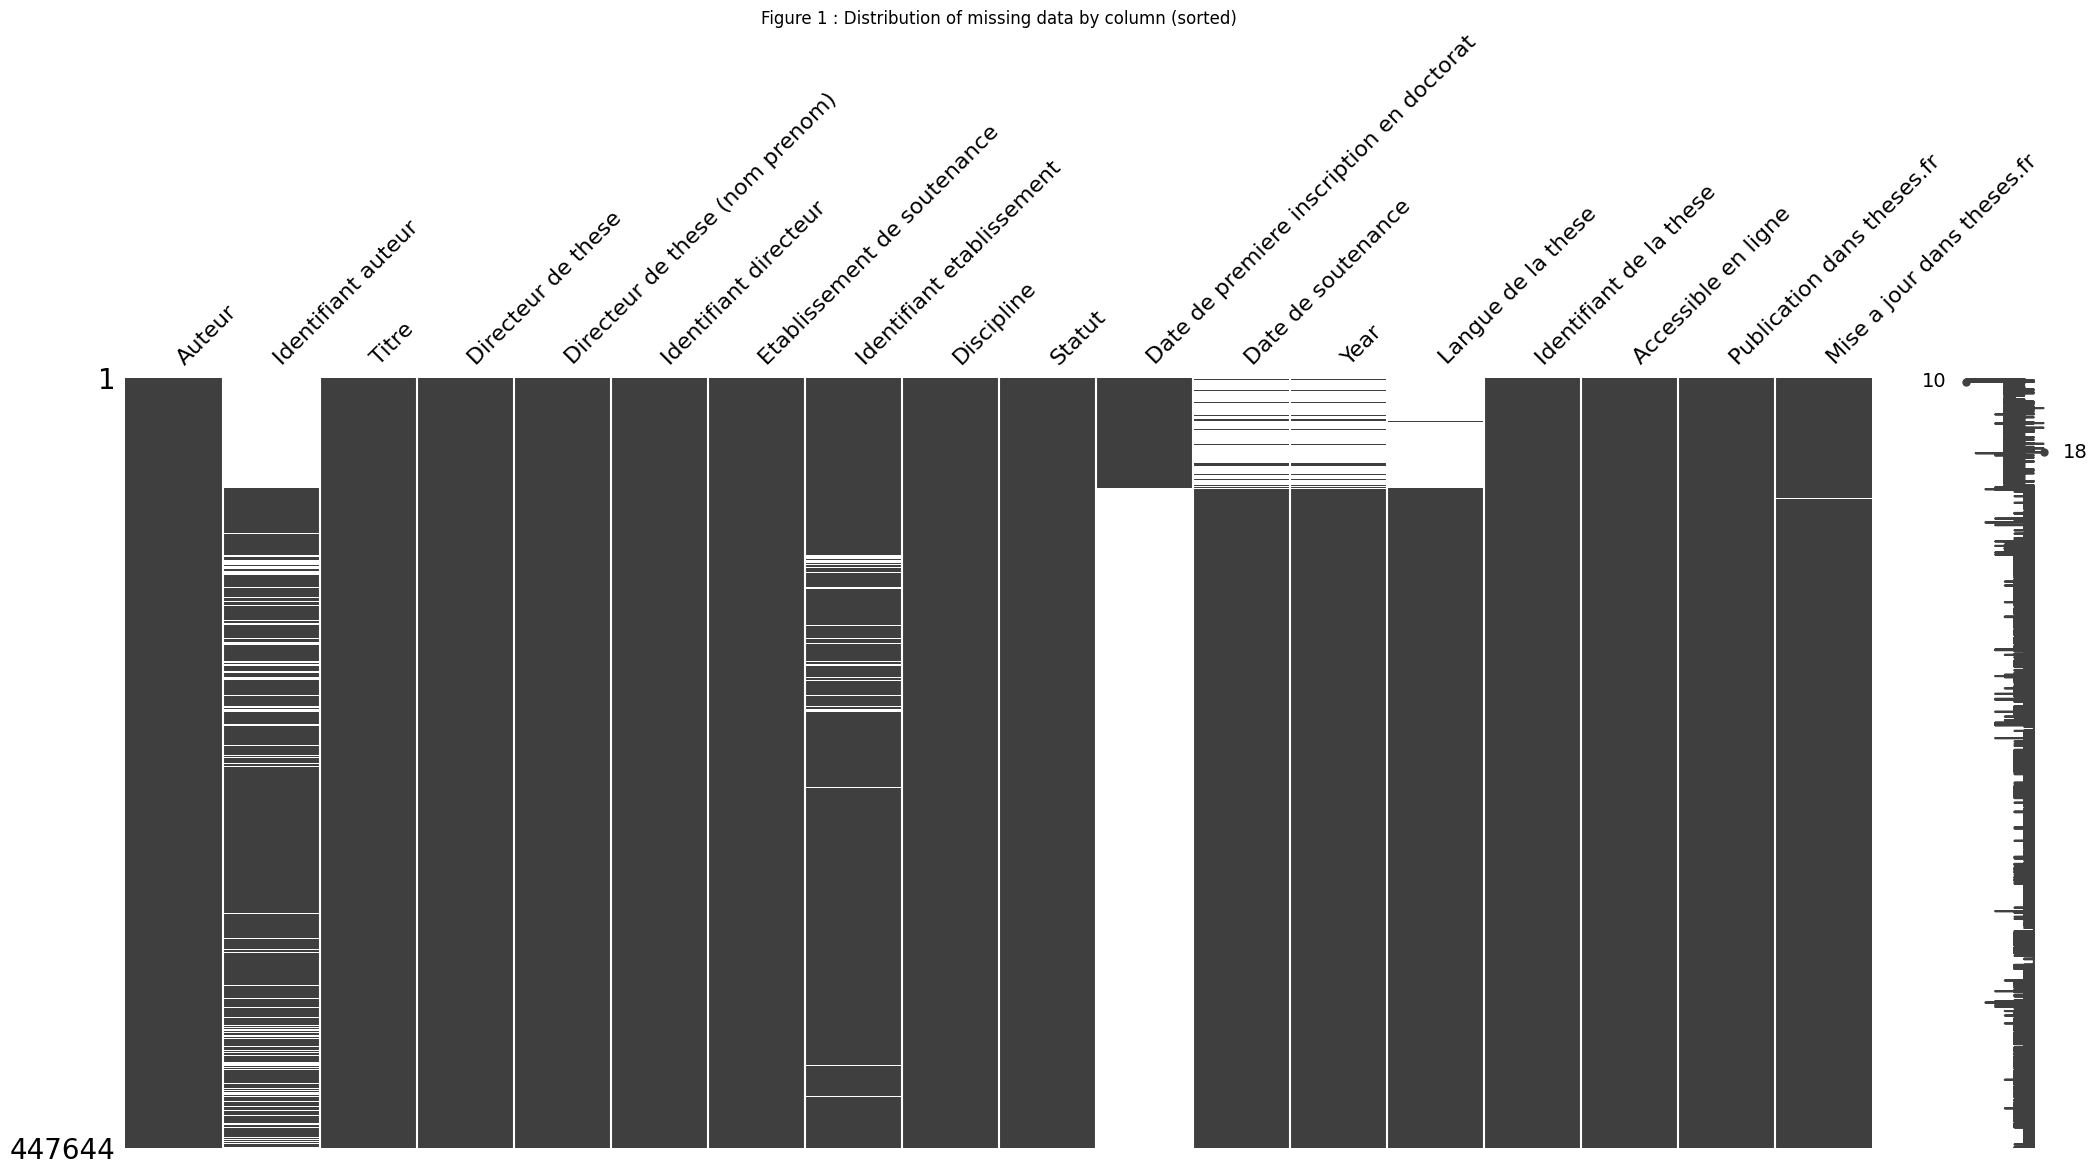

In [14]:
# Sort df_phd_v2 dataframe  on 'Date de premiere inscription en doctorat' column
sorted_values = df_phd_v2.sort_values('Date de premiere inscription en doctorat')

# Visualize the missingness summary of sorted
msno.matrix(sorted_values)
plt.title('Figure 1 : Distribution of missing data by column (sorted)')
plt.savefig('Figure1_Distribution_of_missing_data_by_column_sorted.png', dpi=300)
plt.show() # MNAR

In [15]:
# Calculate the number of missing data globally
df_phd_missingness=df_phd_v2.isnull()
missing_values_sum=df_phd_missingness.sum()

print('Total missing values:\n',missing_values_sum)


Total missing values:
 Auteur                                           0
Identifiant auteur                          129989
Titre                                            9
Directeur de these                              15
Directeur de these (nom prenom)                 15
Identifiant directeur                            0
Etablissement de soutenance                      4
Identifiant etablissement                    17085
Discipline                                       5
Statut                                           0
Date de premiere inscription en doctorat    383668
Date de soutenance                           56746
Year                                         56746
Langue de la these                           63765
Identifiant de la these                          0
Accessible en ligne                              0
Publication dans theses.fr                       0
Mise a jour dans theses.fr                     177
dtype: int64


In [16]:
# Calculate the missing data percentage
df_phd_v2.isna().mean() *100

Auteur                                       0.000000
Identifiant auteur                          29.038477
Titre                                        0.002011
Directeur de these                           0.003351
Directeur de these (nom prenom)              0.003351
Identifiant directeur                        0.000000
Etablissement de soutenance                  0.000894
Identifiant etablissement                    3.816649
Discipline                                   0.001117
Statut                                       0.000000
Date de premiere inscription en doctorat    85.708286
Date de soutenance                          12.676591
Year                                        12.676591
Langue de la these                          14.244578
Identifiant de la these                      0.000000
Accessible en ligne                          0.000000
Publication dans theses.fr                   0.000000
Mise a jour dans theses.fr                   0.039540
dtype: float64

In [17]:
#Creating a sub dataframe with only the column the most concerned by missing data
df_missing_values= df_phd_v2[['Statut','Date de premiere inscription en doctorat','Date de soutenance','Year','Langue de la these','Identifiant auteur']]
df_missing_values.head()





,Statut,Date de premiere inscription en doctorat,Date de soutenance,Year,Langue de la these,Identifiant auteur
0,enCours,30-09-11,NaN,NaN,NaN,NaN
1,enCours,01-10-12,NaN,NaN,NaN,174423705
2,soutenue,NaN,01-01-93,1993.0,fr,NaN
3,enCours,01-06-11,NaN,NaN,NaN,NaN
4,enCours,07-12-09,NaN,NaN,NaN,NaN


In [18]:
# Calculate the quantity of missing data per status
missing_values_quantity=df_missing_values.isna().groupby(df_missing_values['Statut']).sum().transpose()

# Calculate the percentage of missing data per status
all_values=df_phd_v2['Statut'].value_counts()
missing_values_percent=(missing_values_quantity/all_values) * 100

# Rename columns as "En cours" and "Soutenue" (thesis)
missing_values_percent.columns=['En cours', 'Soutenue']

#Display the dataframe with missing percentage
print(missing_values_percent)


                                           En cours    Soutenue
Statut                                     0.000000    0.000000
Date de premiere inscription en doctorat   3.547468  100.000000
Date de soutenance                        85.372914    0.031208
Year                                      85.372914    0.031208
Langue de la these                        95.944459    0.033044
Identifiant auteur                        99.663797   16.753340


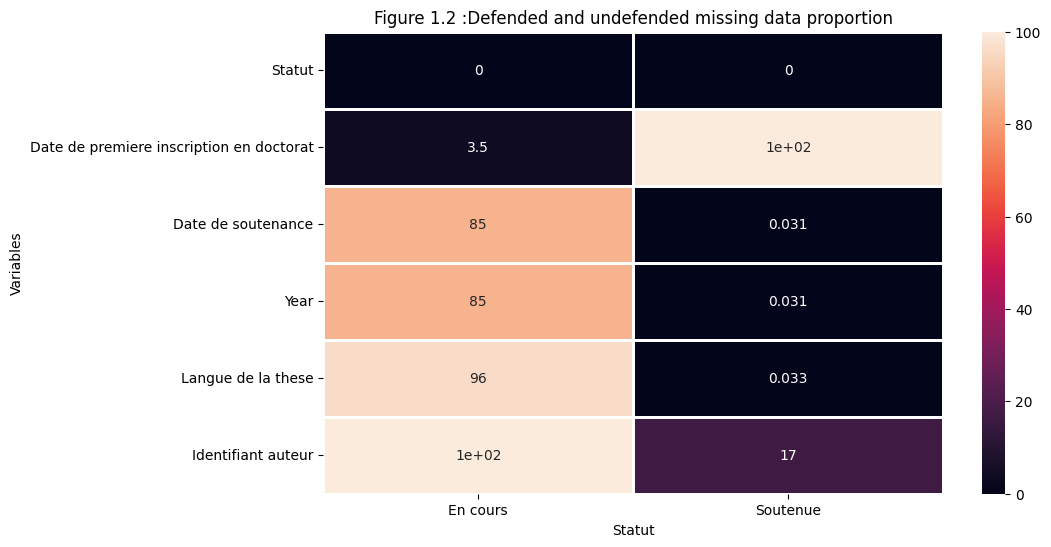

In [19]:
#Plot an heatmap of missing values with percentages to see correlation
plt.figure(figsize=(10,6))
sns.heatmap(missing_values_percent, annot= True, cbar= True, linewidth= 1)
plt.title('Figure 1.2 :Defended and undefended missing data proportion')
plt.xlabel('Statut')
plt.ylabel('Variables')
plt.show()

In [20]:
# Converting 'Date de soutenance' column to Datetime format
df_phd_v2['Date de soutenance'] = pd.to_datetime(df_phd_v2['Date de soutenance'], errors='coerce')

C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\3233421920.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_phd_v2['Date de soutenance'] = pd.to_datetime(df_phd_v2['Date de soutenance'], errors='coerce')


In [21]:
# Verify NaN values after converting the column
missing_dates = df_phd_v2[df_phd_v2['Date de soutenance'].isna()]
if not missing_dates.empty:
    print("Warning : some dates are not converted :", missing_dates)

0             Saeed Al marri                NaN   
1          Andrea Ramazzotti          174423705   
3             Emmanuel Porte                NaN   
4           Arthur Devriendt                NaN   
11          Vladimir Arneuve                NaN   
...                      ...                ...   
447637          Lucas Mosser                NaN   
447638      Jocelyn Poncelet                NaN   
447639          Emir Roumili                NaN   
447640         Nesrine Salah                NaN   
447641  Ghulam sakhi Shokouh                NaN   

                                                    Titre  \
0       Le credit documentaire et l'onopposabilite des...   
1       Application de la PGD a la resolution de probl...   
3       Socio-histoire des politiques publiques en mat...   
4       LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...   
11            Droit de la consommation et responsabilites   
...                                                   ...   
447637  Bet

In [22]:
#4.2. DETECTING AN ISSUE IN THE DATASET
# Creating a sub dataframe filtering data between 1984 and 2018
df_phd_8418 = df_phd_v2[(df_phd_v2['Year'] >= 1984) & (df_phd_v2['Year'] <= 2018)]

In [23]:
# Extract the month from the 'Date de soutenance' column
df_phd_8418['Month'] = df_phd_8418['Date de soutenance'].dt.month

df_phd_8418.head()

C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\146422417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phd_8418['Month'] = df_phd_8418['Date de soutenance'].dt.month


,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,Date de premiere inscription en doctorat,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Month
2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,soutenue,NaN,1993-01-01,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12,1
5,Elmantsr Briak,NaN,Integration forcee de l'afrique subsaharienne ...,Edmond Jouve,Jouve Edmond,26941848,Paris 5,26404788,Science politique,enCours,01-12-02,2008-11-24,2008.0,NaN,s6336,non,26-09-11,16-11-11,11
6,Jae-hyun Park,NaN,Execution des decisions de justice condamnant ...,Pierre Comte,Comte Pierre,na,Saint Etienne,28209966,Droit public,enCours,01-02-02,2005-01-07,2005.0,NaN,s8305,non,26-09-11,02-02-12,1
7,Laurent david Benoiton,NaN,Les effets des arrets de la Cour europeenne de...,Laurent Sermet,Sermet Laurent,34508287,La Reunion,26404451,Droit public,enCours,01-10-03,2009-08-12,2009.0,NaN,s11271,non,26-09-11,26-04-12,8
8,Jennifer Guiraud (McKELLIPS),NaN,L'autobiographie sans frontieres : espace et d...,Anne-Emmanuelle Berger,Berger Anne-Emmanuelle,32574088,Paris 8,26403552,Etudes de genre,enCours,01-11-03,2013-10-01,2013.0,NaN,s11354,non,26-09-11,04-04-16,10


In [24]:
# Converting month column into a new month name column to get a better display

df_phd_8418['Month_Name'] = df_phd_8418['Date de soutenance'].dt.strftime('%B')

df_phd_8418.head()

C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\2048585954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phd_8418['Month_Name'] = df_phd_8418['Date de soutenance'].dt.strftime('%B')


,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,Date de premiere inscription en doctorat,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Month,Month_Name
2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,soutenue,NaN,1993-01-01,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12,1,January
5,Elmantsr Briak,NaN,Integration forcee de l'afrique subsaharienne ...,Edmond Jouve,Jouve Edmond,26941848,Paris 5,26404788,Science politique,enCours,01-12-02,2008-11-24,2008.0,NaN,s6336,non,26-09-11,16-11-11,11,November
6,Jae-hyun Park,NaN,Execution des decisions de justice condamnant ...,Pierre Comte,Comte Pierre,na,Saint Etienne,28209966,Droit public,enCours,01-02-02,2005-01-07,2005.0,NaN,s8305,non,26-09-11,02-02-12,1,January
7,Laurent david Benoiton,NaN,Les effets des arrets de la Cour europeenne de...,Laurent Sermet,Sermet Laurent,34508287,La Reunion,26404451,Droit public,enCours,01-10-03,2009-08-12,2009.0,NaN,s11271,non,26-09-11,26-04-12,8,August
8,Jennifer Guiraud (McKELLIPS),NaN,L'autobiographie sans frontieres : espace et d...,Anne-Emmanuelle Berger,Berger Anne-Emmanuelle,32574088,Paris 8,26403552,Etudes de genre,enCours,01-11-03,2013-10-01,2013.0,NaN,s11354,non,26-09-11,04-04-16,10,October


In [25]:
print(sns.__version__) 

0.13.2


In [26]:
# Ranking month for the next graph
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Calculate counts for each month
month_counts = df_phd_8418['Month_Name'].value_counts().reindex(months_order)

month_counts

Month_Name
January      286770
February       4411
March          6037
April          4874
May            6114
June           9224
July           4605
August         3490
September     11619
October       10067
November      15299
December      16599
Name: count, dtype: int64

In [27]:
# Convert 'Month_Name' to a categorical type with a specified order
df_phd_8418['Month_Name'] = pd.Categorical(df_phd_8418['Month_Name'], categories=months_order, ordered=True)

C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\129400346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phd_8418['Month_Name'] = pd.Categorical(df_phd_8418['Month_Name'], categories=months_order, ordered=True)


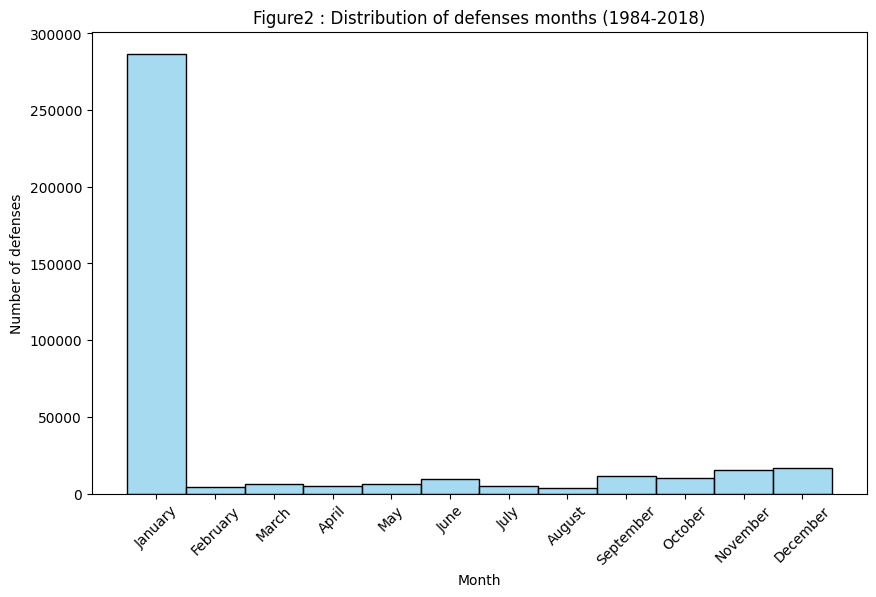

In [28]:
# Create an histogram concerning defenses' months

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_phd_8418, 
    x='Month_Name', 
    bins=12, 
    color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of defenses')
plt.title('Figure2 : Distribution of defenses months (1984-2018)')
plt.xticks(rotation=45)
plt.savefig('Figure2_Distribution_of_defenses_months_(1984-2018).png',dpi=300)
plt.show()


In [29]:
# Extract the year from the 'Date de soutenance' column
df_phd_8418['Année'] = df_phd_8418['Date de soutenance'].dt.year

df_phd_8418.head()

C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\1973209281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phd_8418['Année'] = df_phd_8418['Date de soutenance'].dt.year


,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,...,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Month,Month_Name,Année
2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,soutenue,...,1993-01-01,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12,1,January,1993
5,Elmantsr Briak,NaN,Integration forcee de l'afrique subsaharienne ...,Edmond Jouve,Jouve Edmond,26941848,Paris 5,26404788,Science politique,enCours,...,2008-11-24,2008.0,NaN,s6336,non,26-09-11,16-11-11,11,November,2008
6,Jae-hyun Park,NaN,Execution des decisions de justice condamnant ...,Pierre Comte,Comte Pierre,na,Saint Etienne,28209966,Droit public,enCours,...,2005-01-07,2005.0,NaN,s8305,non,26-09-11,02-02-12,1,January,2005
7,Laurent david Benoiton,NaN,Les effets des arrets de la Cour europeenne de...,Laurent Sermet,Sermet Laurent,34508287,La Reunion,26404451,Droit public,enCours,...,2009-08-12,2009.0,NaN,s11271,non,26-09-11,26-04-12,8,August,2009
8,Jennifer Guiraud (McKELLIPS),NaN,L'autobiographie sans frontieres : espace et d...,Anne-Emmanuelle Berger,Berger Anne-Emmanuelle,32574088,Paris 8,26403552,Etudes de genre,enCours,...,2013-10-01,2013.0,NaN,s11354,non,26-09-11,04-04-16,10,October,2013


In [30]:
# Creating a sub dataframe filtering data between 2005 and 2018
df_phd_0518 = df_phd_8418[(df_phd_8418["Year"] >= 2005) & (df_phd_8418["Year"] <= 2018)]


In [31]:
# Filtering and Aggregating  to get the quantity of soutenance by Month and Year  using Month and Année columns.
# Use groupby() and select a column without missing data to make a count
nb_defenses_month_year = df_phd_0518.groupby(["Month_Name","Année"])["Identifiant de la these"].count().reset_index()

print(nb_defenses_month_year)


    Month_Name  Année  Identifiant de la these
0      January   2005                    10526
1      January   2006                    10889
2      January   2007                    11355
3      January   2008                    10744
4      January   2009                     9693
..         ...    ...                      ...
163   December   2014                     1721
164   December   2015                     1712
165   December   2016                     2036
166   December   2017                     2288
167   December   2018                     2357

[168 rows x 3 columns]


C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\98137400.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nb_defenses_month_year = df_phd_0518.groupby(["Month_Name","Année"])["Identifiant de la these"].count().reset_index()


In [32]:
# Convert 'Month_Name' to a categorical type with a specified order
df_phd_0518['Month_Name'] = pd.Categorical(df_phd_0518['Month_Name'], categories=months_order, ordered=True)


C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\3065013571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phd_0518['Month_Name'] = pd.Categorical(df_phd_0518['Month_Name'], categories=months_order, ordered=True)


<Figure size 1000x600 with 0 Axes>

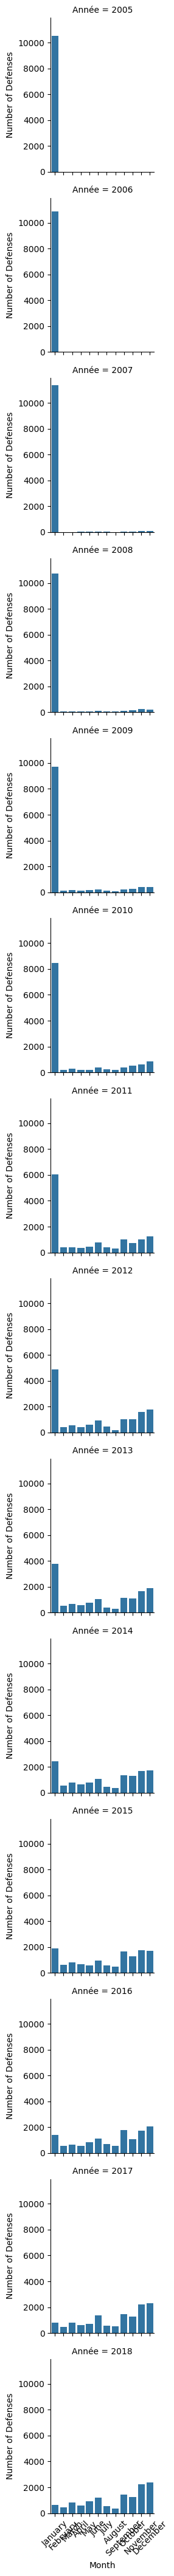

In [33]:
# Create a Facetgrid 
plt.figure(figsize=( 10,6))
g = sns.FacetGrid(nb_defenses_month_year,row= "Année",row_order=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])
g.map(sns.barplot, "Month_Name", "Identifiant de la these", order = months_order)
g.set_axis_labels("Month", "Number of Defenses")

plt.xticks(rotation=45)

plt.show()


In [34]:
# Creating a sub dataframe calculating the mean and std by month from 2005-2018
df_monthly_stats= nb_defenses_month_year.groupby('Month_Name')['Identifiant de la these'].agg(['mean','std']).reset_index()
df_monthly_stats

C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\1516574479.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_monthly_stats= nb_defenses_month_year.groupby('Month_Name')['Identifiant de la these'].agg(['mean','std']).reset_index()


,Month_Name,mean,std
0,January,5968.500000,4186.701010
1,February,314.571429,242.615148
2,March,430.357143,334.535868
3,April,347.571429,267.481621
4,May,435.714286,347.676337
5,June,657.571429,505.981258
6,July,328.071429,247.023656
7,August,248.785714,195.968278
8,September,828.357143,669.716887
9,October,718.142857,530.201102


In [35]:
df_monthly_stats['Month_Name'].dtype

CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November',
                  'December'],
, ordered=True, categories_dtype=object)

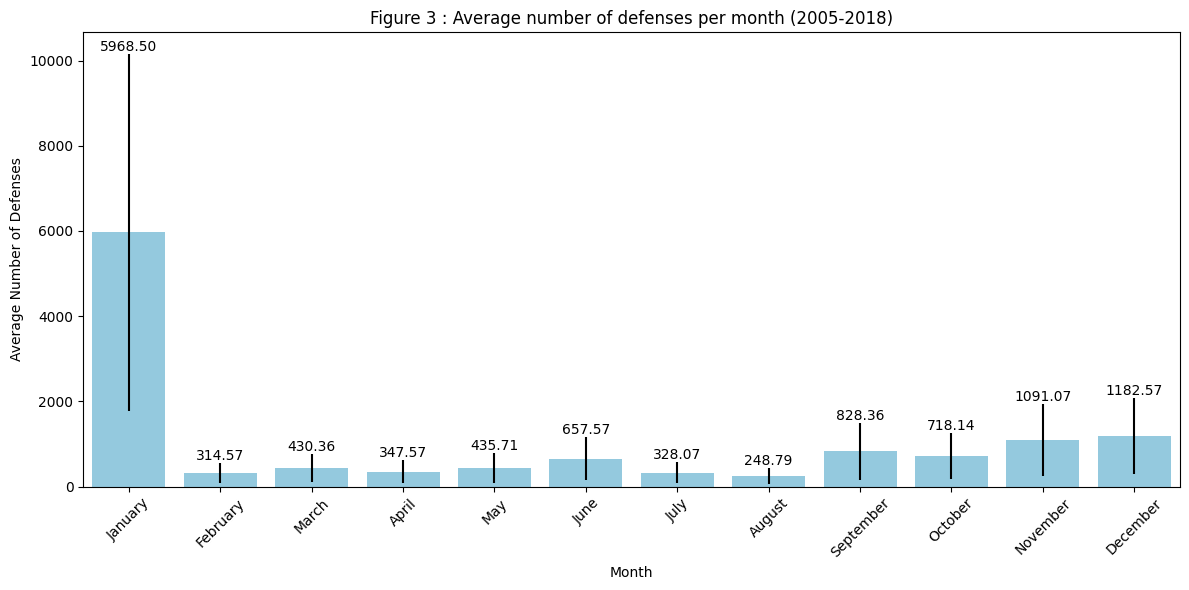

In [36]:
# Create a barplot  of the average number of defenses per month from 2005 to 2018. Add an error bar.
plt.figure(figsize= (12,6))
sns.barplot(data=df_monthly_stats, x='Month_Name', y='mean', order=months_order, 
            yerr=df_monthly_stats['std'], capsize=0.1, color='Skyblue')
for i, row in df_monthly_stats.iterrows(): # Annotate each bar
    plt.text(i, row['mean'] + row['std'] + 1, f"{row['mean']:.2f}", ha='center', va='bottom')
plt.title('Figure 3 : Average number of defenses per month (2005-2018)')    
plt.xlabel('Month')
plt.ylabel('Average Number of Defenses')
plt.xticks(rotation=45)
plt.savefig('Figure3_Average_Number_of_Defenses_per_Month_(2005-2018).png', dpi=300)
plt.tight_layout()
plt.show()

In [37]:
# Filter data for January defenses
df_january_defenses = df_phd_0518[(df_phd_0518['Month_Name'] == 'January')]
                              

# Calculate the number of January defenses per year
january_defenses_count = df_january_defenses['Year'].value_counts().sort_index()

january_defenses_count


Year
2005.0    10526
2006.0    10889
2007.0    11355
2008.0    10744
2009.0     9693
2010.0     8458
2011.0     6054
2012.0     4898
2013.0     3762
2014.0     2454
2015.0     1872
2016.0     1409
2017.0      805
2018.0      640
Name: count, dtype: int64

In [38]:
# Calculate the total number of defenses per year
total_defenses = df_phd_0518['Year'].value_counts().sort_index()

# Print total defenses to check if it's calculated correctly
print("Total defenses per year:")
print(total_defenses)


Total defenses per year:
Year
2005.0    10562
2006.0    10975
2007.0    11697
2008.0    11854
2009.0    12033
2010.0    12516
2011.0    13110
2012.0    13985
2013.0    13868
2014.0    13202
2015.0    13023
2016.0    12965
2017.0    13123
2018.0    12805
Name: count, dtype: int64


In [39]:
# Calculate the proportion of defenses in January per year
proportion_january = (january_defenses_count / total_defenses) * 100

print(proportion_january )

Year
2005.0    99.659155
2006.0    99.216401
2007.0    97.076173
2008.0    90.636072
2009.0    80.553478
2010.0    67.577501
2011.0    46.178490
2012.0    35.023239
2013.0    27.127199
2014.0    18.588093
2015.0    14.374568
2016.0    10.867721
2017.0     6.134268
2018.0     4.998048
Name: count, dtype: float64


In [40]:
# Fill missing years with zero (for years with no January defenses)
all_years = pd.Series(0, index=range(2005, 2019))
proportion_january = proportion_january.add(all_years, fill_value=0)

# Print the proportion to verify results
print("Proportion of January defenses per year:")
print(proportion_january)

Proportion of January defenses per year:
Year
2005.0    99.659155
2006.0    99.216401
2007.0    97.076173
2008.0    90.636072
2009.0    80.553478
2010.0    67.577501
2011.0    46.178490
2012.0    35.023239
2013.0    27.127199
2014.0    18.588093
2015.0    14.374568
2016.0    10.867721
2017.0     6.134268
2018.0     4.998048
dtype: float64


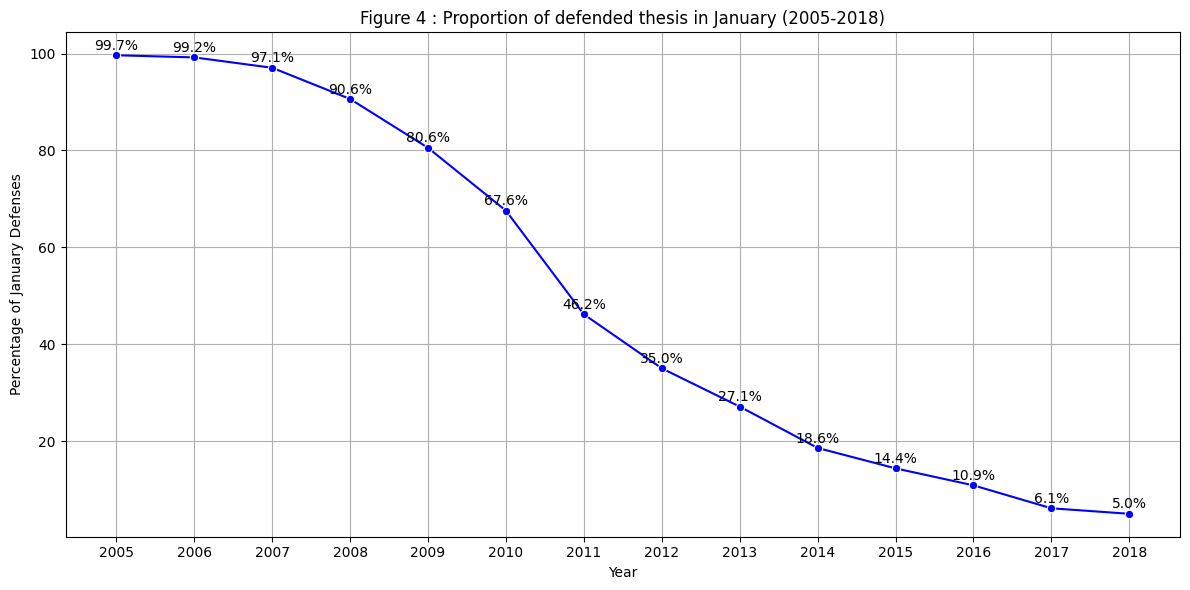

In [41]:
# Plotting the results
plt.figure(figsize=(12, 6))
sns.lineplot(x=proportion_january.index, y=proportion_january.values, marker='o', color='b')

# Customizing the plot
plt.title('Figure 4 : Proportion of defended thesis in January (2005-2018)')
plt.xlabel('Year')
plt.ylabel('Percentage of January Defenses')
plt.grid(True)

# Adding annotations
for year, percentage in zip(proportion_january.index, proportion_january.values):
    plt.text(year, percentage + 0.5, f"{percentage:.1f}%", ha='center', va='bottom')

# Display the plot
plt.xticks(proportion_january.index)
plt.savefig('Figure4_Proportion_of_defended_thesis_in_January_(2005-2018).png',dpi=300)
plt.tight_layout()
plt.show()

In [42]:
# Create a sub dataframe of defenses from 2005 to 2018 excluding January
df_phd_0518_no_january = df_phd_8418[(df_phd_8418["Year"] >= 2005) & 
                          (df_phd_8418["Year"] <= 2018) & 
                          (df_phd_8418["Month_Name"] != 'January')]


In [43]:
# Group by Month and Year and count the number of theses
nb_defenses_month_year_no_january = df_phd_0518_no_january.groupby(["Month_Name", "Année"])["Identifiant de la these"].count().reset_index()

nb_defenses_month_year_no_january



C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\2311694296.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nb_defenses_month_year_no_january = df_phd_0518_no_january.groupby(["Month_Name", "Année"])["Identifiant de la these"].count().reset_index()


,Month_Name,Année,Identifiant de la these
0,January,2005,0
1,January,2006,0
2,January,2007,0
3,January,2008,0
4,January,2009,0
...,...,...,...
163,December,2014,1721
164,December,2015,1712
165,December,2016,2036
166,December,2017,2288


In [44]:
# Calculate the total number of defenses per year
total_defenses_per_year_no_january = df_phd_0518_no_january.groupby("Année")["Identifiant de la these"].count().reset_index(name="Total_Defenses")

total_defenses_per_year_no_january

,Année,Total_Defenses
0,2005,36
1,2006,86
2,2007,342
3,2008,1110
4,2009,2340
5,2010,4058
6,2011,7056
7,2012,9087
8,2013,10106
9,2014,10748


In [45]:
# Merge to include the total defenses per year in the month-year DataFrame
nb_defenses_month_year_no_january = nb_defenses_month_year_no_january.merge(total_defenses_per_year_no_january, on="Année")

nb_defenses_month_year_no_january

,Month_Name,Année,Identifiant de la these,Total_Defenses
0,January,2005,0,36
1,January,2006,0,86
2,January,2007,0,342
3,January,2008,0,1110
4,January,2009,0,2340
...,...,...,...,...
163,December,2014,1721,10748
164,December,2015,1712,11151
165,December,2016,2036,11556
166,December,2017,2288,12318


In [46]:
# Calculate the proportion of defenses for each month
nb_defenses_month_year_no_january["Proportion"] = (nb_defenses_month_year_no_january["Identifiant de la these"] / nb_defenses_month_year_no_january["Total_Defenses"]) * 100

# Print to verify the proportions
print("Proportion of defenses by month-year (excluding January):")
print(nb_defenses_month_year_no_january)

Proportion of defenses by month-year (excluding January):
    Month_Name  Année  Identifiant de la these  Total_Defenses  Proportion
0      January   2005                        0              36    0.000000
1      January   2006                        0              86    0.000000
2      January   2007                        0             342    0.000000
3      January   2008                        0            1110    0.000000
4      January   2009                        0            2340    0.000000
..         ...    ...                      ...             ...         ...
163   December   2014                     1721           10748   16.012281
164   December   2015                     1712           11151   15.352883
165   December   2016                     2036           11556   17.618553
166   December   2017                     2288           12318   18.574444
167   December   2018                     2357           12165   19.375257

[168 rows x 5 columns]


In [47]:
# Calculate mean and std deviation of the proportion of defenses per month
monthly_stats = nb_defenses_month_year_no_january.groupby("Month_Name")["Proportion"].agg(['mean', 'std']).reset_index()

# Print to verify the statistics
print("Monthly statistics (mean and std deviation of proportions):")
print(monthly_stats)

Monthly statistics (mean and std deviation of proportions):
   Month_Name       mean       std
0     January   0.000000  0.000000
1    February   4.453016  1.031809
2       March   5.906944  1.480737
3       April   4.830615  1.146690
4         May   6.449503  1.363765
5        June   9.908329  0.890468
6        July   5.395815  2.042277
7      August   4.213219  1.229286
8   September  11.107824  2.684654
9     October  12.585904  4.106909
10   November  17.874074  2.655391
11   December  17.274757  3.348330


C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\3486512799.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_stats = nb_defenses_month_year_no_january.groupby("Month_Name")["Proportion"].agg(['mean', 'std']).reset_index()


C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\4055238744.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\4055238744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


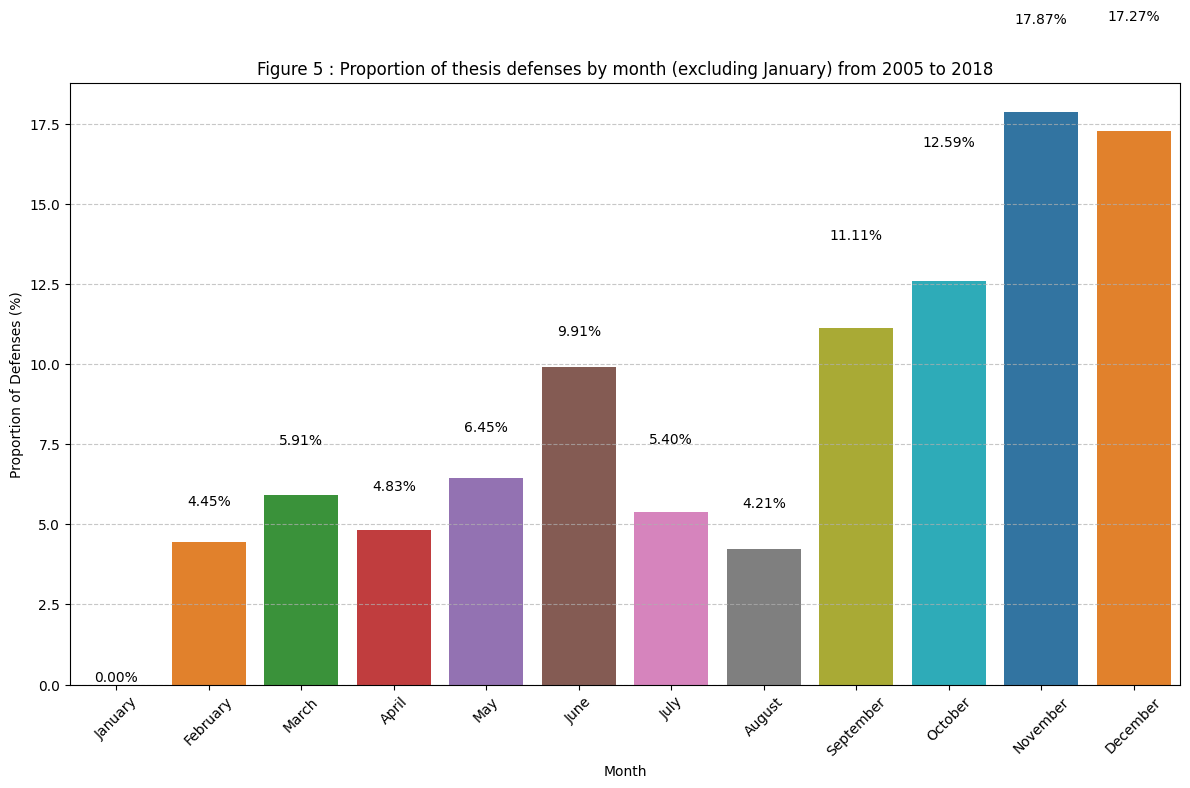

In [50]:
# Plot the mean proportion of defenses per month with error bars
plt.figure(figsize=(12, 8))
sns.barplot(
    data=monthly_stats,
    x="Month_Name",
    y="mean",
    order=months_order,
    ci=None,  # Disable automatic confidence interval calculation
    palette="tab10"
)

# Add annotations on each bar
for index, row in monthly_stats.iterrows():
    plt.text(
        index,  # x-position: the index of the bar (ordinal)
        row['mean'] + row['std'],  # y-position: a bit above the bar for visibility
        f'{row["mean"]:.2f}%',  # text label
        color='black',  # text color
        ha="center",  # horizontal alignment
        va="bottom",  # vertical alignment
        fontsize=10  # font size
    )
        

# Customize the plot
plt.title('Figure 5 : Proportion of thesis defenses by month (excluding January) from 2005 to 2018')
plt.xlabel('Month')
plt.ylabel('Proportion of Defenses (%)')
plt.xticks(rotation=45)
plt.savefig('Figure5_Proportion_of_thesis_defenses_by_month_(Excluding_January)_from_2005_to_2018')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [51]:
# Create the subset DataFrame about authors
df_author_id_thesis = df_phd_v2[['Auteur','Identifiant de la these']]

# Display the first few rows of the subset
df_author_id_thesis.head()



,Auteur,Identifiant de la these
0,Saeed Al marri,s69480
1,Andrea Ramazzotti,s98826
2,OLIVIER BODENREIDER,1993NAN19006
3,Emmanuel Porte,s88867
4,Arthur Devriendt,s89663


In [52]:
# Filter the DataFrame for the author "Cécile Martin"
celine_martin_thesis = df_author_id_thesis[df_author_id_thesis['Auteur'].str.contains('Celine Martin', case=False, na=False)]

# Count the number of unique thesis identifiers
number_of_thesis_by_celine_martin = celine_martin_thesis['Auteur'].nunique()

number_of_thesis_by_celine_martin


5

In [53]:
# Filter the DataFrame for the authors with family name "Martin"
martin_thesis = df_author_id_thesis[df_author_id_thesis['Auteur'].str.contains('Martin', case=False, na=False)]

# Count the number of unique thesis identifiers
thesis_by_martin = martin_thesis['Auteur'].nunique()

df_thesis_by_martin = pd.DataFrame(martin_thesis)
df_thesis_by_martin

,Auteur,Identifiant de la these
682,Matthieu Dumartin,s31847
690,Martine Poreau (Joube),s41210
1073,Jean martin Mondoloni,s48175
1156,Martine Thirard (Gagetta),s35534
1422,Maria del rayo Jeldes (Martinez),s47759
...,...,...
447120,Jean-Max Martin,1986TOU30059
447355,Martine Bazin-Redureau,1995PA05CD11
447373,Marie-Pascale Martin,2003BOR16024
447429,Clarissa De araujo martins,s181333


In [54]:
# Counting the number of thesis by thesis ID and group the result by author
df_thesis_by_martin_count = df_thesis_by_martin.groupby('Auteur')['Identifiant de la these'].nunique().reset_index(name='Thesis Count')

# Filtering on namesakes with at least 2 in the Thesis Count column
df_thesis_by_martin_count_filtered = df_thesis_by_martin_count[df_thesis_by_martin_count['Thesis Count'] >= 9]
df_thesis_by_martin_count_filtered

,Auteur,Thesis Count
234,Bruno Martin,10
329,Celine Martin,11
683,Franck Martin,12
769,Guillaume Martin,9
1102,Laurent Martin,11
2855,Nathalie Martin,10
2871,Nicolas Martin,16
2896,Olivier Martin,11
2926,Pascal Martin,10
2940,Patrick Martin,9


In [55]:
df_phd_v2.head()

,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,Date de premiere inscription en doctorat,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr
0,Saeed Al marri,NaN,Le credit documentaire et l'onopposabilite des...,Philippe Delebecque,Delebecque Philippe,29561248,Paris 1,27361802,Driot prive,enCours,30-09-11,NaT,NaN,NaN,s69480,non,26-01-12,26-01-12
1,Andrea Ramazzotti,174423705,Application de la PGD a la resolution de probl...,"Jean-Claude Grandidier,Marianne Beringhier","Grandidier Jean-Claude,Beringhier Marianne","715,441,511","Chasseneuil-du-Poitou, Ecole nationale superie...",28024400,"Mecanique des solides, des materiaux, des stru...",enCours,01-10-12,NaT,NaN,NaN,s98826,non,22-11-13,22-11-13
2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,soutenue,NaN,1993-01-01,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12
3,Emmanuel Porte,NaN,Socio-histoire des politiques publiques en mat...,Gilles Pollet,Pollet Gilles,na,Lyon 2,02640334X,Science politique,enCours,01-06-11,NaT,NaN,NaN,s88867,non,12-07-13,12-01-16
4,Arthur Devriendt,NaN,LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...,Gabriel Dupuy,Dupuy Gabriel,na,Paris 1,27361802,Geographie,enCours,07-12-09,NaT,NaN,NaN,s89663,non,13-07-13,12-07-13


In [56]:
#4.3 DETECTION DES OUTLIERS
# Create a new dataset from PhD_v2 focusing on thesis supervised by directors from 1984 to 2018
df_phd_directors = df_phd_8418[['Directeur de these','Directeur de these (nom prenom)','Identifiant directeur', 'Discipline','Identifiant de la these','Year']]
df_phd_directors.head()


,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Discipline,Identifiant de la these,Year
2,Francois Kohler,Kohler Francois,57030758,Medecine,1993NAN19006,1993.0
5,Edmond Jouve,Jouve Edmond,26941848,Science politique,s6336,2008.0
6,Pierre Comte,Comte Pierre,na,Droit public,s8305,2005.0
7,Laurent Sermet,Sermet Laurent,34508287,Droit public,s11271,2009.0
8,Anne-Emmanuelle Berger,Berger Anne-Emmanuelle,32574088,Etudes de genre,s11354,2013.0


In [57]:
nb_directors = df_phd_directors["Directeur de these"].nunique()
nb_directors

129089

In [58]:
# Step 1: Calculate the unique thesis count for each director
df_phd_directors['Thesis count by director'] = df_phd_directors.groupby('Directeur de these (nom prenom)')['Identifiant de la these'].transform('nunique')

# Step 2: Drop duplicates to avoid redundant entries
df_unique_director_counts = df_phd_directors[['Directeur de these (nom prenom)', 'Thesis count by director']].drop_duplicates()

# Step 3: Sort directors by the number of theses
df_unique_director_counts = df_unique_director_counts.sort_values(by='Thesis count by director', ascending=False)

# Display the DataFrame for verification
print("Unique Director Counts:")
print(df_unique_director_counts)



Unique Director Counts:
          Directeur de these (nom prenom)  Thesis count by director
7705           Directeur de these inconnu                     711.0
90380              Scherrmann Jean-Michel                     208.0
196                   Blanc Francois-Paul                     201.0
3161                        Brunel Pierre                     195.0
90141                     Bertucat Michel                     173.0
...                                   ...                       ...
137054       Tudor Ciprian A.,Zili Mounir                       1.0
137050                      Poulin Lionel                       1.0
137049  Tasiemski Aurelie,Jollivet Didier                       1.0
447628       Panier Stephane,Franz Gerald                       1.0
85642                                 NaN                       NaN

[129093 rows x 2 columns]


C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\1196948182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phd_directors['Thesis count by director'] = df_phd_directors.groupby('Directeur de these (nom prenom)')['Identifiant de la these'].transform('nunique')


In [59]:
df_high_thesis_count = df_unique_director_counts[df_unique_director_counts['Thesis count by director'] > 80]

df_high_thesis_count

,Directeur de these (nom prenom),Thesis count by director
7705,Directeur de these inconnu,711.0
90380,Scherrmann Jean-Michel,208.0
196,Blanc Francois-Paul,201.0
3161,Brunel Pierre,195.0
90141,Bertucat Michel,173.0
3195,Pujolle Guy,172.0
2174,Teyssie Bernard,138.0
30252,Lumley Henry de,132.0
88386,Chaumeil Jean-Claude,131.0
5956,Foucart Bruno,130.0


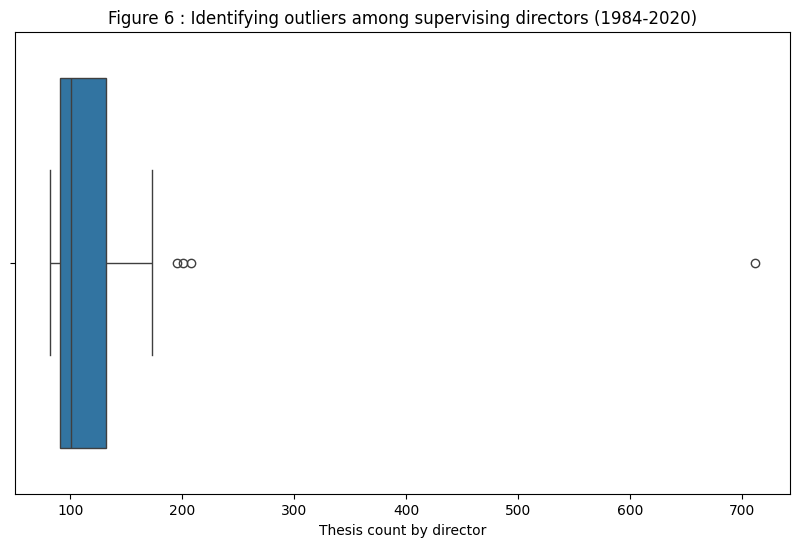

In [60]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_high_thesis_count['Thesis count by director'])
plt.title('Figure 6 : Identifying outliers among supervising directors (1984-2020)')
plt.savefig('Figure6_Identifying_outliers_among_supervising_directors_(1984-2020)')
plt.show()

In [61]:
# Calculate Q1, Q3, and IQR
Q1 = df_high_thesis_count['Thesis count by director'].quantile(0.25)
Q3 = df_high_thesis_count['Thesis count by director'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df_high_thesis_count[(df_high_thesis_count['Thesis count by director'] < lower_bound)
                                 | (df_high_thesis_count['Thesis count by director'] > upper_bound)]

num_outliers = outliers.shape[0]

In [62]:
# Output results
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'Number of Outliers: {num_outliers}')
print('Outliers:')
print(outliers)

Q1: 91.25
Q3: 131.75
IQR: 40.5
Lower Bound: 30.5
Upper Bound: 192.5
Number of Outliers: 4
Outliers:
      Directeur de these (nom prenom)  Thesis count by director
7705       Directeur de these inconnu                     711.0
90380          Scherrmann Jean-Michel                     208.0
196               Blanc Francois-Paul                     201.0
3161                    Brunel Pierre                     195.0


In [63]:
# Create a new dataframe focusing on Jean Michel Schermann
df_schermann_case= df_phd_8418[df_phd_8418['Directeur de these'] == 'Jean-Michel Scherrmann']
df_schermann_case.head(5)

# Filter on useful columns
df_schermann_case_filtered = df_schermann_case[['Directeur de these (nom prenom)','Identifiant de la these','Month_Name','Année']]
df_schermann_case_filtered


,Directeur de these (nom prenom),Identifiant de la these,Month_Name,Année
90380,Scherrmann Jean-Michel,2011PA05P622,January,2011
91570,Scherrmann Jean-Michel,2001PA05P043,January,2001
97927,Scherrmann Jean-Michel,2005PA05P630,January,2005
98808,Scherrmann Jean-Michel,2008PA05P652,January,2008
103898,Scherrmann Jean-Michel,1999PA05P078,January,1999
...,...,...,...,...
410785,Scherrmann Jean-Michel,1999PA05P605,January,1999
420034,Scherrmann Jean-Michel,1993PA066706,January,1993
441788,Scherrmann Jean-Michel,1998PA05P615,January,1998
446144,Scherrmann Jean-Michel,1996PA05CD06,January,1996


In [64]:
# Calculate the quantity of theses by year for Scherrmann Jean-Michel	
theses_by_year = df_schermann_case_filtered.groupby('Année').size().reset_index(name='Thesis Count by Year')
theses_by_year



,Année,Thesis Count by Year
0,1989,11
1,1990,13
2,1991,11
3,1992,22
4,1993,28
5,1994,40
6,1995,28
7,1996,25
8,1997,7
9,1998,2


In [65]:
# Calculate the quantity of theses by month for Scherrmann Jean-Michel	
theses_by_month = df_schermann_case_filtered.groupby('Month_Name').size().reset_index(name='Thesis Count by Month')
theses_by_month

C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\1893555664.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  theses_by_month = df_schermann_case_filtered.groupby('Month_Name').size().reset_index(name='Thesis Count by Month')


,Month_Name,Thesis Count by Month
0,January,207
1,February,0
2,March,1
3,April,0
4,May,0
5,June,0
6,July,0
7,August,0
8,September,0
9,October,0


In [66]:
# Create a new dataframe focusing on François-Paul Blanc
df_blanc_case= df_phd_8418[df_phd_8418['Directeur de these'] == 'Francois-Paul Blanc']
df_blanc_case.head(5)

# Filter on useful columns
df_blanc_case_filtered = df_blanc_case[['Directeur de these (nom prenom)','Identifiant de la these','Month_Name','Année']]
df_blanc_case_filtered


,Directeur de these (nom prenom),Identifiant de la these,Month_Name,Année
196,Blanc Francois-Paul,s16209,September,2011
1083,Blanc Francois-Paul,s43110,May,2006
59982,Blanc Francois-Paul,2005PERP0954,January,2005
88980,Blanc Francois-Paul,2007PERP0753,January,2007
90516,Blanc Francois-Paul,2005PERP0710,January,2005
...,...,...,...,...
309783,Blanc Francois-Paul,2008PERP0913,January,2008
322388,Blanc Francois-Paul,2008PERP0912,January,2008
334560,Blanc Francois-Paul,2008PERP0805,January,2008
362336,Blanc Francois-Paul,2006PERP0663,January,2006


In [67]:
# Calculate the quantity of theses by year for Blanc François-Paul	
blanc_theses_by_year = df_blanc_case_filtered.groupby('Année').size().reset_index(name='Thesis Count by Year')
blanc_theses_by_year

,Année,Thesis Count by Year
0,1995,2
1,1996,2
2,1997,1
3,1998,1
4,1999,5
5,2000,8
6,2001,14
7,2002,12
8,2003,12
9,2004,33


In [68]:
# Calculate the quantity of theses by month for Blanc Paul-François	
blanc_theses_by_month = df_blanc_case_filtered.groupby('Month_Name').size().reset_index(name='Thesis Count by Month')
blanc_theses_by_month

C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\3352818278.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blanc_theses_by_month = df_blanc_case_filtered.groupby('Month_Name').size().reset_index(name='Thesis Count by Month')


,Month_Name,Thesis Count by Month
0,January,199
1,February,0
2,March,0
3,April,0
4,May,1
5,June,0
6,July,0
7,August,0
8,September,1
9,October,0


In [69]:
# Create a new dataframe focusing on Brunel Pierre
df_brunel_case= df_phd_8418[df_phd_8418['Directeur de these'] == 'Pierre Brunel']
df_brunel_case.head(5)

# Filter on useful columns
df_brunel_case_filtered = df_brunel_case[['Directeur de these (nom prenom)','Identifiant de la these','Month_Name','Année']]
df_brunel_case_filtered

,Directeur de these (nom prenom),Identifiant de la these,Month_Name,Année
3161,Brunel Pierre,1986PA040201,January,1986
7863,Brunel Pierre,2001PA040073,January,2001
14687,Brunel Pierre,2011PA040241,July,2011
15122,Brunel Pierre,2010PA040236,November,2010
26158,Brunel Pierre,2009PA040168,October,2009
...,...,...,...,...
433483,Brunel Pierre,1986PA040162,January,1986
434408,Brunel Pierre,1990PA040054,January,1990
434737,Brunel Pierre,1997PA040119,January,1997
435212,Brunel Pierre,1991PA040134,January,1991


In [70]:
# Calculate the quantity of theses by year for brunel Pierre
brunel_theses_by_year = df_brunel_case_filtered.groupby('Année').size().reset_index(name='Thesis Count by Year')
brunel_theses_by_year

,Année,Thesis Count by Year
0,1985,2
1,1986,5
2,1987,14
3,1988,4
4,1989,3
5,1990,10
6,1991,13
7,1992,8
8,1993,8
9,1994,11


In [71]:
# Calculate the quantity of theses by month for Pierre Brunel	
brunel_theses_by_month = df_brunel_case_filtered.groupby('Month_Name').size().reset_index(name='Thesis Count by Month')
brunel_theses_by_month

C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\2224479848.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brunel_theses_by_month = df_brunel_case_filtered.groupby('Month_Name').size().reset_index(name='Thesis Count by Month')


,Month_Name,Thesis Count by Month
0,January,188
1,February,0
2,March,0
3,April,0
4,May,1
5,June,0
6,July,1
7,August,0
8,September,1
9,October,3


In [72]:
# Create a new dataframe focusing on Philippe Delebecque
df_delebecque_case= df_phd_8418[df_phd_8418['Directeur de these'] == 'Philippe Delebecque']
df_delebecque_case.head(5)

# Filter on useful columns
df_delebecque_case_filtered = df_delebecque_case[['Directeur de these (nom prenom)','Identifiant de la these','Month_Name','Année']]
df_delebecque_case_filtered

,Directeur de these (nom prenom),Identifiant de la these,Month_Name,Année
3488,Delebecque Philippe,s89061,January,2014
3667,Delebecque Philippe,s90568,July,2015
6490,Delebecque Philippe,s136749,June,2015
24145,Delebecque Philippe,2016PA01D040,October,2016
24146,Delebecque Philippe,2016PA01D032,March,2016
...,...,...,...,...
352257,Delebecque Philippe,1995PA010254,January,1995
361810,Delebecque Philippe,2002PA010290,January,2002
365526,Delebecque Philippe,2015PA010304,December,2015
368522,Delebecque Philippe,2002PA010312,January,2002


In [73]:
# Calculate the quantity of theses by year for Philippe Delebecque
delebecque_theses_by_year = df_delebecque_case_filtered.groupby('Année').size().reset_index(name='Thesis Count by Year')
delebecque_theses_by_year

,Année,Thesis Count by Year
0,1988,1
1,1990,2
2,1991,1
3,1992,1
4,1994,3
5,1995,1
6,1996,1
7,1997,3
8,1998,1
9,2000,6


In [74]:
# Calculate the quantity of theses by month for Philippe Delebecque	
delebecque_theses_by_month = df_delebecque_case_filtered.groupby('Month_Name').size().reset_index(name='Thesis Count by Month')
delebecque_theses_by_month

C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\262944850.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delebecque_theses_by_month = df_delebecque_case_filtered.groupby('Month_Name').size().reset_index(name='Thesis Count by Month')


,Month_Name,Thesis Count by Month
0,January,64
1,February,1
2,March,4
3,April,1
4,May,3
5,June,9
6,July,3
7,August,1
8,September,2
9,October,7


In [75]:
# 4.4 OBTENTION DE RESULTATS PRELIMINAIRES

In [76]:
df_phd_8418.head()

,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,...,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Month,Month_Name,Année
2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,soutenue,...,1993-01-01,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12,1,January,1993
5,Elmantsr Briak,NaN,Integration forcee de l'afrique subsaharienne ...,Edmond Jouve,Jouve Edmond,26941848,Paris 5,26404788,Science politique,enCours,...,2008-11-24,2008.0,NaN,s6336,non,26-09-11,16-11-11,11,November,2008
6,Jae-hyun Park,NaN,Execution des decisions de justice condamnant ...,Pierre Comte,Comte Pierre,na,Saint Etienne,28209966,Droit public,enCours,...,2005-01-07,2005.0,NaN,s8305,non,26-09-11,02-02-12,1,January,2005
7,Laurent david Benoiton,NaN,Les effets des arrets de la Cour europeenne de...,Laurent Sermet,Sermet Laurent,34508287,La Reunion,26404451,Droit public,enCours,...,2009-08-12,2009.0,NaN,s11271,non,26-09-11,26-04-12,8,August,2009
8,Jennifer Guiraud (McKELLIPS),NaN,L'autobiographie sans frontieres : espace et d...,Anne-Emmanuelle Berger,Berger Anne-Emmanuelle,32574088,Paris 8,26403552,Etudes de genre,enCours,...,2013-10-01,2013.0,NaN,s11354,non,26-09-11,04-04-16,10,October,2013


In [77]:
# Create a new dataframe to study language and accessibility columns
df_phd_languages_on_off_line = df_phd_8418[['Identifiant de la these','Date de soutenance','Année','Accessible en ligne','Langue de la these']]
df_phd_languages_on_off_line.head()

,Identifiant de la these,Date de soutenance,Année,Accessible en ligne,Langue de la these
2,1993NAN19006,1993-01-01,1993,non,fr
5,s6336,2008-11-24,2008,non,NaN
6,s8305,2005-01-07,2005,non,NaN
7,s11271,2009-08-12,2009,non,NaN
8,s11354,2013-10-01,2013,non,NaN


In [78]:
# Define a function to categorize languages
def categorize_language(lang):
    if lang == 'fr':
        return 'French'
    elif lang == 'en':
        return 'English'
    elif lang in ['enfr', 'fren']:
        return 'Bilingual'
    else:
        return 'Other'

# Apply the categorization function
df_phd_languages_on_off_line['language.rec'] = df_phd_languages_on_off_line['Langue de la these'].apply(categorize_language)


df_phd_languages_on_off_line

C:\Users\emmhu\AppData\Local\Temp\ipykernel_10236\3848824284.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phd_languages_on_off_line['language.rec'] = df_phd_languages_on_off_line['Langue de la these'].apply(categorize_language)


,Identifiant de la these,Date de soutenance,Année,Accessible en ligne,Langue de la these,language.rec
2,1993NAN19006,1993-01-01,1993,non,fr,French
5,s6336,2008-11-24,2008,non,NaN,Other
6,s8305,2005-01-07,2005,non,NaN,Other
7,s11271,2009-08-12,2009,non,NaN,Other
8,s11354,2013-10-01,2013,non,NaN,Other
...,...,...,...,...,...,...
447596,2018LYSE2082,2018-06-11,2018,non,fr,French
447597,2015ENMP0012,2015-11-03,2015,oui,fr,French
447612,2018GREAS049,2018-12-19,2018,oui,fr,French
447622,2018GREAS050,2018-07-12,2018,oui,fr,French


In [79]:
# Aggregate the data to count the number of thesis per year and language
df_language_count = df_phd_languages_on_off_line.groupby(['Année', 'language.rec']).size().reset_index(name='Language Quantity')


df_language_count

,Année,language.rec,Language Quantity
0,1984,French,6
1,1985,Bilingual,73
2,1985,English,11
3,1985,French,2917
4,1985,Other,6
...,...,...,...
132,2017,Other,731
133,2018,Bilingual,741
134,2018,English,3429
135,2018,French,7807


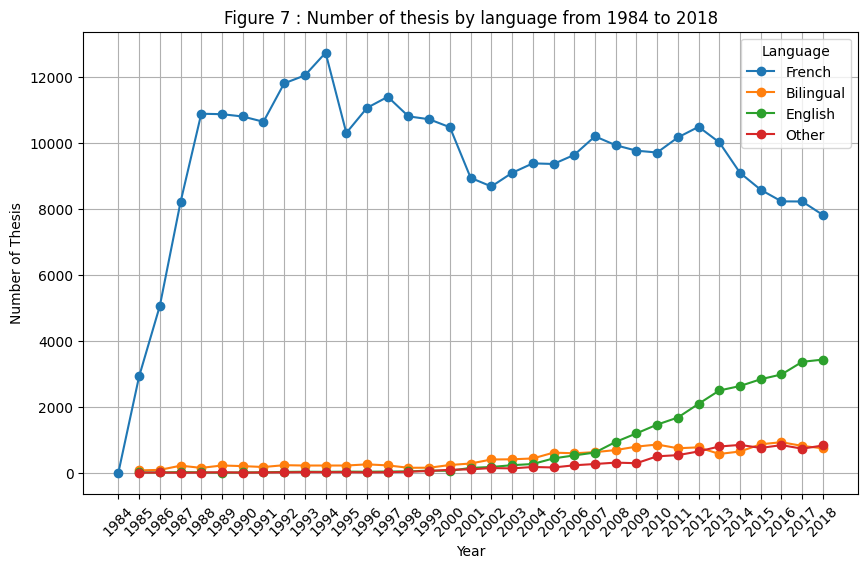

In [80]:
# Plotting the line graph using Matplotlib
plt.figure(figsize=(10, 6))

# Plot each language line separately
for language in df_language_count['language.rec'].unique():
    data = df_language_count[df_language_count['language.rec'] == language]
    plt.plot(data['Année'], data['Language Quantity'], marker='o', label=language)

plt.title('Figure 7 : Number of thesis by language from 1984 to 2018')
plt.xlabel('Year')
plt.ylabel('Number of Thesis')
plt.xticks(df_language_count['Année'].unique(), rotation= 45)  # Ensure each year is shown on the x-axis
plt.legend(title='Language')
plt.grid(True)
plt.savefig('Figure7_Number_of_thesis_by_language_from_1984_to_2018')
plt.show()

In [81]:
# Count the number of online and offline thesis from 1984 to 2018
df_accessibility_count = df_phd_languages_on_off_line.groupby(['Année', 'Accessible en ligne']).size().reset_index(name='Accessibility Quantity')

df_accessibility_count


,Année,Accessible en ligne,Accessibility Quantity
0,1984,non,6
1,1985,non,2902
2,1985,oui,105
3,1986,non,5025
4,1986,oui,137
...,...,...,...
64,2016,oui,8341
65,2017,non,4194
66,2017,oui,8929
67,2018,non,4601


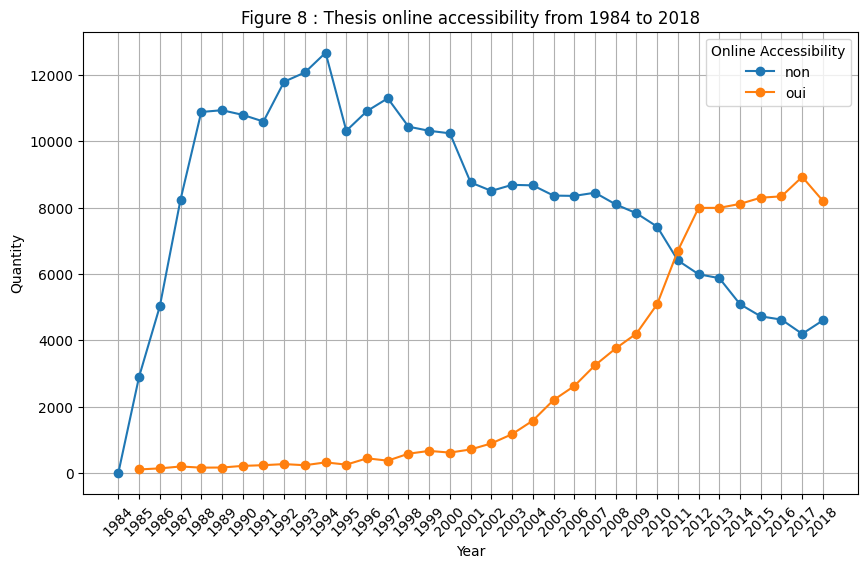

In [82]:
# Plotting the line graph using Matplotlib
plt.figure(figsize=(10, 6))

# Plot each accessibility line separately
for accessibility in df_accessibility_count['Accessible en ligne'].unique():
    data = df_accessibility_count[df_accessibility_count['Accessible en ligne'] == accessibility]
    plt.plot(data['Année'], data['Accessibility Quantity'], marker='o', label=accessibility)

plt.title('Figure 8 : Thesis online accessibility from 1984 to 2018')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(df_accessibility_count['Année'].unique(), rotation= 45)  # Ensure each year is shown on the x-axis
plt.legend(title='Online Accessibility')
plt.grid(True)
plt.savefig('Figure8_Thesis_online_accessibility_from_1984_to_2018.png',dpi=300)
plt.show()